In [104]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import datetime

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Daten\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

We take a look at the election predictions dependend on the article value, for different parties

In [105]:
df

,Unnamed: 0,date,SPD,Union,Grüne,FDP,AfD,Linke,FW,Andere,standardized_war_articles
0,0,2023-12-22,14.0,32.0,14.0,5.0,21.0,3.0,4,7,0.149730
1,1,2023-12-07,14.0,32.0,15.0,4.0,21.0,3.0,3,8,0.169740
2,2,2023-11-10,15.0,30.0,15.0,5.0,21.0,4.0,3,7,0.193503
3,3,2023-11-02,16.0,30.0,14.0,4.0,22.0,5.0,3,6,0.179060
4,4,2023-10-13,15.0,29.0,13.0,5.0,23.0,4.0,4,7,0.195236
...,...,...,...,...,...,...,...,...,...,...,...
685,685,2000-07-01,39.0,38.0,6.0,8.0,NaN,5.0,-,4,0.008333
686,686,2000-06-01,38.0,39.0,7.0,9.0,NaN,5.0,-,2,0.015557
687,687,2000-05-01,41.0,36.0,6.0,7.0,NaN,5.0,-,5,0.027951
688,688,2000-04-07,39.0,34.0,8.0,7.0,NaN,7.0,-,5,0.014863


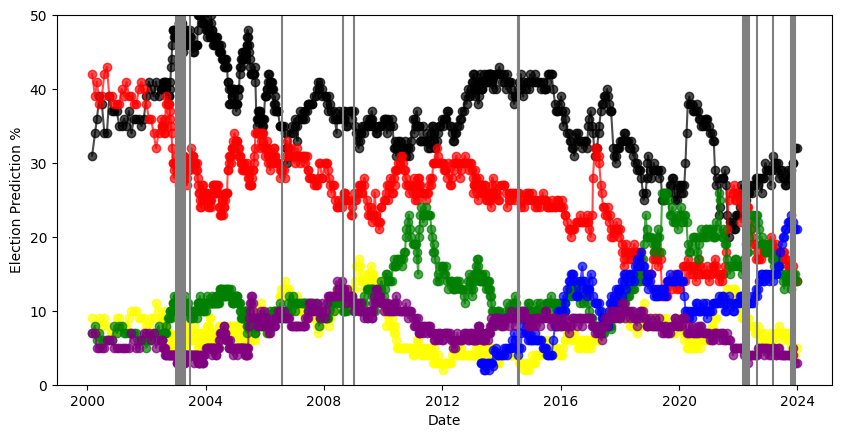

In [123]:
# threshhold? 0.2?
data_war_filtered = df.loc[df["standardized_war_articles"] >= 0.15]

# plot filtered by date
def plot(df, df_war, year):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(10) 
    ax1.set_ylim([0, 50])
    ax1.set_xlabel('Date') 
    ax1.set_ylabel('Election Prediction %')
    ax1.plot(df['date'], df['Union'], marker='o', linestyle='-',
             label='Union', color='black', alpha=0.7)
    ax1.plot(df['date'], df['SPD'], marker='o', linestyle='-',
             label='SPD', color='red', alpha=0.7)
    ax1.plot(df['date'], df['FDP'], marker='o', linestyle='-',
             label='FDP', color='yellow', alpha=0.7)
    ax1.plot(df['date'], df['Grüne'], marker='o', linestyle='-',
             label='Grüne', color='green', alpha=0.7)
    ax1.plot(df['date'], df['AfD'], marker='o', linestyle='-',
             label='AfD', color='blue', alpha=0.7)
    ax1.plot(df['date'], df['Linke'], marker='o', linestyle='-',
             label='Linke', color='purple', alpha=0.7)
    ax1.vlines(df_war['date'], ymin=0, ymax=50, colors="grey")

# plot for all time
plot(df, df.loc[df["standardized_war_articles"] >= 0.15], "")

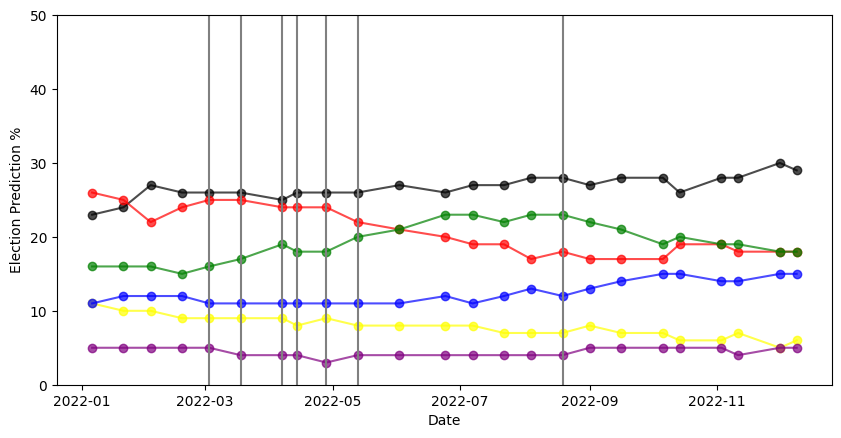

In [124]:
# choose a year with a lot of articles -> 2022
year = 2022
data_war_filtered_year = data_war_filtered.loc[data_war_filtered["date"].dt.year == year]
data_year = df.loc[df["date"].dt.year == year]
plot(data_year, data_war_filtered_year, year)

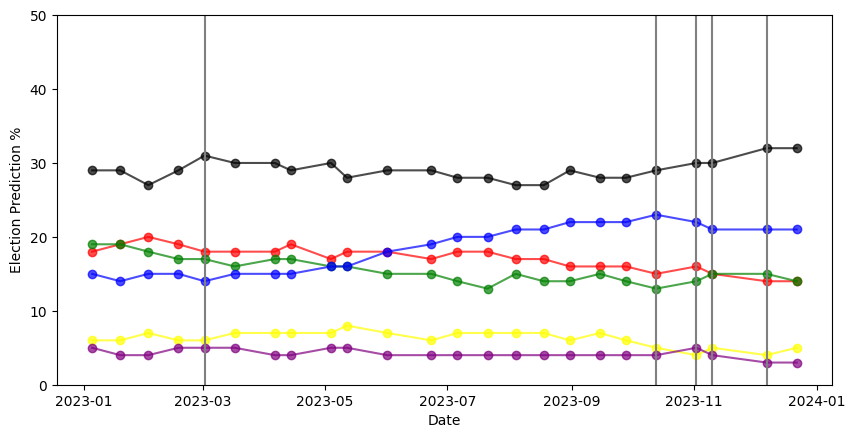

In [125]:
# choose a year with a lot of articles -> 2023
year = 2023
data_war_filtered_year = data_war_filtered.loc[data_war_filtered["date"].dt.year == year]
data_year = df.loc[df["date"].dt.year == year]
plot(data_year, data_war_filtered_year, year)

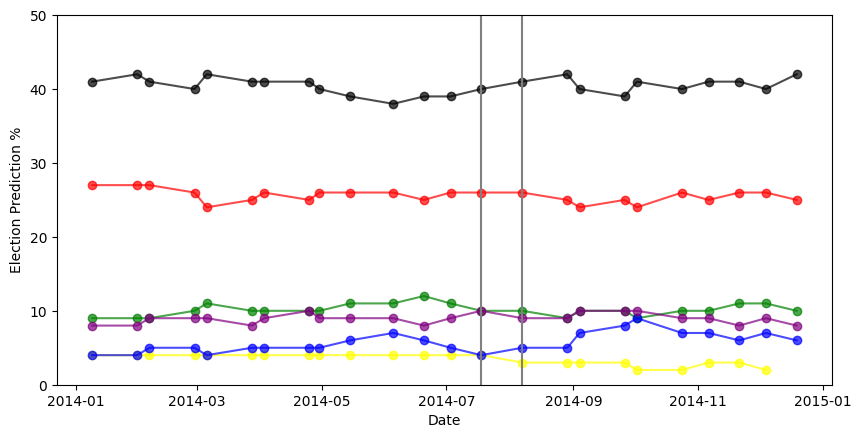

In [126]:
# choose a year with a lot of articles -> 2014
year = 2014
data_war_filtered_year = data_war_filtered.loc[data_war_filtered["date"].dt.year == year]
data_year = df.loc[df["date"].dt.year == year]
plot(data_year, data_war_filtered_year, year)